# Temas Tratados en el Trabajo Práctico 4

* Representación del Conocimiento y Razonamiento Lógico.

* Estrategias de resolución de hipótesis: Encadenamiento hacia Adelante, Encadenamiento hacia Atrás y Resolución por Contradicción.

* Representación basada en circuitos.

## Ejercicios Teóricos

1. ¿Qué es una inferencia?

La inferencia es el proceso de derivar nuevas conclusiones a partir de un conjunto de premisas o sentencias previas en una base de conocimiento. Este proceso permite obtener nuevas verdades de manera lógica, aplicando reglas de deducción que aseguran que si las premisas son verdaderas, las conclusiones también lo serán. Un ejemplo clásico es el Modus Ponens, donde de dos premisas como “si P entonces Q” y “P es verdadero”, se puede inferir que Q es verdadero​


2. ¿Cómo se verifica que un modelo se infiere de la base de conocimientos?

Para verificar si un modelo se infiere de una base de conocimientos, se utiliza un proceso llamado comprobación de modelos. Este método consiste en enumerar todos los modelos posibles y comprobar si la sentencia que se desea inferir es verdadera en todos los modelos donde la base de conocimiento también lo es. Si la sentencia se mantiene verdadera en todos los casos, entonces se puede concluir que se infiere correctamente de esta base de conocimiento. 
Además, un algoritmo de inferencia sólido asegura que todas las sentencias derivadas sean verdaderas en los mundos donde la base de conocimiento es verdadera, garantizando la solidez del proceso de inferencia.


3. Observe la siguiente base de conocimiento:

$R1: b ∧ c → a$

$R2: d ∧ e → b$

$R3: g ∧ e → b$

$R4: e → c$

$R5: d$

$R6: e$

$R7: a ∧ g → f$

        3.1 ¿Cómo se puede probar que $a = True$ a través del encadenamiento hacia adelante? Este método solamente usa reglas ya incorporadas a la base de conocimiento para inferir la hipótesis, ¿qué propiedad debe tener el algoritmo para asegurar que esta inferencia sea posible?

        El algoritmo comienza a partir de los hechos conocidos (literales positivos) de la base de conocimiento.
        Como d y e son verdaderas luego utiliza la implicación R4 e infiere que c es verdadera, (R8:c) y añade esta inferencia al conjunto de hechos conocidos. 
        Luego de R2 se infiere que b es verdadera, añade R9:b al conjunto
        Cada regla que añadimos ahora forma parte de la base de conocimiento.
        Luego con R1 se infiere R10: a , y se agrega a la BC. Asi llegamos a lo que se queria probar, usando encamiento hacia adelante. 

        Para que este algoritmo se pueda usar se debe cumplir la propiedad de completitud, solo se puede inferir a=True cuando la BC es completa.

        3.2 ¿Cómo se puede probar que $a = True$ a través del encadenamiento hacia atrás? Este método asigna un valor de verdad a la hipótesis y deriva las sentencias de la base de conocimiento, ¿qué propiedad debe tener el algoritmo para asegurar que esta derivación sea posible?

        Este algoritmo supone a=True y se agrega R8: a a la BC.
        Ahora se busca las implicaciones de la BC donde se concluye a, entonces si el algoritmo puede probar que las premisas son verdaderas lo sera a. 
        El algoritmo toma R1 y agrega a la BC:  R9: b ∧ c 
        Tenemos R10: b y R11: c . Podemos seguir aplicando lo mismo con estas dos reglas ya que hay preposiciones en las que se concluye b y c (son cabeza de alguna preposición).
        A continuación tendriamos que implicar que g ∧ e es verdadero, pero esto no se puede hacer ya que no voy a poder verificar (con encadenamiento hacia atras) que g es verdadera, ya que no hay ninguna implicación que concluya g= True.

        Por esto el algoritmo vuelve y busca otra regla. 
        de R2 se toma R12: d ∧ e como verdadero, esto si se puede verificar con R5 y R6, entonces se agrega R13: b 
        Con R4 se toma R14: e , esto se puede verificar y se concluye R15: c.
        Entonces con R15: c y R13:b ya probamos que las premisas de R1 son verdaderas y por ende R16:a, queda probado que a=True. 

        3.3 Exprese la base de conocimiento en su Forma Normal Conjuntiva. A continuación, demuestre por contradicción que $a = True$.

        (b^c->a)^(d^e->b)^(g^e->b)^(e->c)^d^e^(a^g->f)^-a

        Desarrollo con la equivalencia A->B=(-A o B)

        (-(b^c)v a)^(-(d^e)v b)^(-e v c)^d^e^(-(a^g)v f)^-a
        (-b v -c v a)^(-d v -e v b)^(-e v c)^d^e^(-a v -g v f)^-a

        Luego de haber llegado a la forma normal conjuntiva, empezamos a hacer inferencias.
        Partimos de las reglas atomicas:

        Utilizamos -a, e y luego d:
         (-b v -c v FALSO)^(-d v -e v b)^(-e v c)^d^e^(VERDADERO v -g v f)^VERDADERO
         (-b v -c)^(-d v -e v b)^(-e v c)^d^e
         (-b v -c)^(-d v FALSO v b)^(FALSO v c)^d^VERDADERO
        (-b v -c)^(-d v b)^c^d
        (-b v -c)^(FALSO v b)^c^VERDADERO
        (-b v -c)^b^c

        (FALSO v -c)^VERDADERO^c
        -c^c

        Vemos que nos queda una contradicción, por lo cual -a no podria ser verdadero, o sea que llegamos a la conlcusión que a = True.



4. Observe los elementos involucrados en el diagrama eléctrico de una casa y construya una base de conocimientos que contemple cuándo las luces están o no encendidas, si por los cables pasa o no corriente, la posición en la que se encuentran los fusibles, si los fusibles están en buen estado o no y si llega corriente a los enchufes.

![DiagramaElectrico](https://drive.google.com/uc?export=view&id=1u_1TdrtY6Ez2vaCsDAWveuPZGwdH6SSa)

        4.1 Imagine que un técnico necesita hacer un diagnóstico de por qué la bombilla $l_1$ está encendida. Para hacerlo, empieza a evaluar el circuito desde la toma de corriente exterior a la de la casa. Describa el proceso lógico que sigue el técnico.

        OP
        l1

        OP -> W5
        W5 -> Cb1
        Cb1 -> W3 

        (en s1 y s2 tenemos que decidir que es que este en verdadero si el interruptor arriba o abajo, decidimos arriba como verdadero)
        W3 -> S1 ^ S2 
        W3 -> -S1 ^ -S2

        S1 -> W1 
        -S1 -> W2 

        S2 ^ W1 -> W0
        -S2 ^ W2 -> W0 

        W0 -> l1


        4.2 Ahora imagine que una persona le describe la situación al técnico desde el interior de la casa. Describa el proceso lógico que le comunica al técnico.
        
        l1 -> W0
        
        W0 -> S2 ^ W1
        W0 -> -S2 ^ W2 

        W1 -> S1
        W2 -> -S1

        S1 ^ S2 -> W3
        -S1 ^ -S2 -> W3 

        W3 -> Cb1 
        Cb1 -> W5 
        W5 -> OP 
        

5. Diseñe con lógica proposicional basada en circuitos las proposiciones *OrientadoDerecha* y *Agente ubicado en la casilla [1,2]* para el mundo de wumpus de 4x4. Dibuje el circuito correspondiente.

Para estar orientado a la derecha en el tiempo actual empezamos analizando los tiempos anteriores:

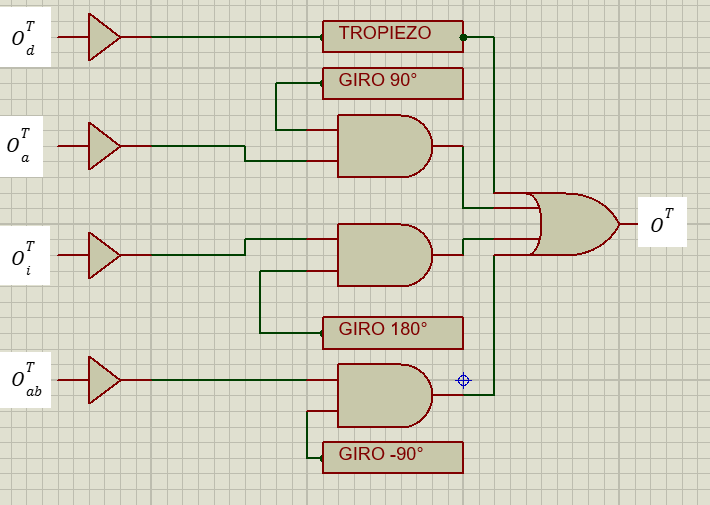

Ahora veamos como llega a la casilla [1,2]:

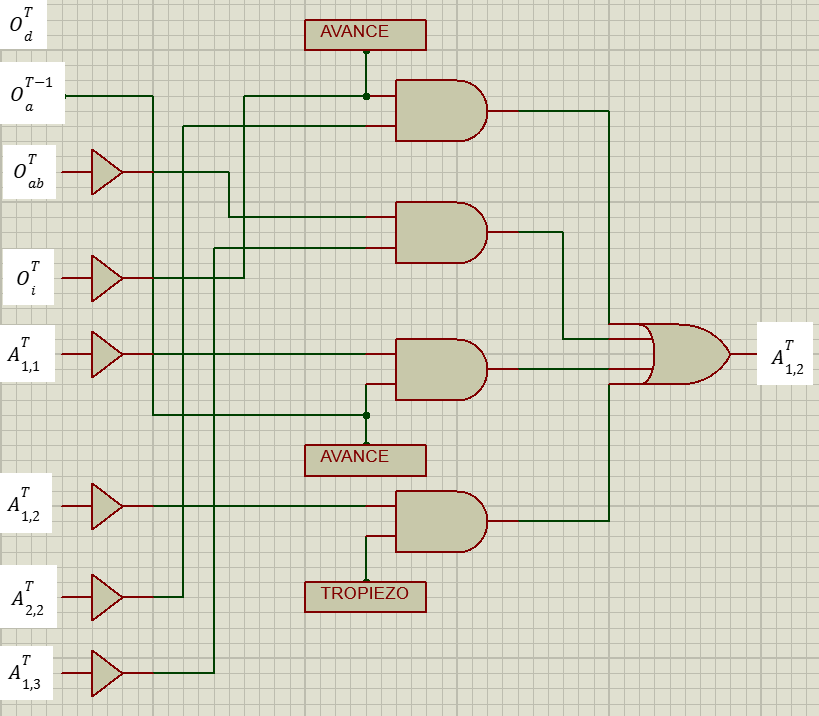

        

6. El nonograma es un juego en el cual se posee un tablero en blanco y cada fila y columna presenta información sobre la longitud de un bloque en dicha fila/columna. Además, la leyenda puede indicar más de un número, indicando esto que existen varios bloques de las longitudes mostradas por la leyenda y en el mismo orden, separados por al menos un espacio vacío.

Resuelva el nonograma de la imagen de abajo escribiendo en primer lugar cada regla que puede incorporarse a la base de conocimientos inicial e incorporando cada inferencia que realice.

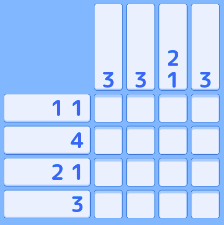
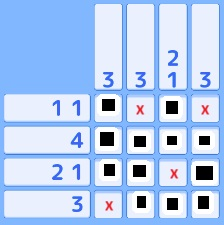

        # Reglas

        R1 = "([C1,1] ∧ [C1,3]) ∨ ([C1,2] ∧ [C1,4]) ∨ ([C1,1] ∧ [C1,4])"
        R2 = "([C2,1] ∧ [C2,2] ∧ [C2,3] ∧ [C2,4])"
        R3 = "([C3,1] ∧ [C3,2] ∧ [C3,4])"
        R4 = "([C4,1] ∧ [C4,2] ∧ [C4,3]) ∨ ([C4,2] ∧ [C4,3] ∧ [C4,4])"
        R5 = "([C1,1] ∧ [C2,1] ∧ [C3,1]) ∨ ([C2,1] ∧ [C3,1] ∧ [C4,1])"
        R6 = "([C1,2] ∧ [C2,2] ∧ [C3,2]) ∨ ([C2,2] ∧ [C3,2] ∧ [C4,2])"
        R7 = "([C1,3] ∧ [C2,3] ∧ [C4,3])"
        R8 = "([C1,4] ∧ [C2,4] ∧ [C3,4]) ∨ ([C2,4] ∧ [C3,4] ∧ [C4,4])"

        # Inferencias

        R9 = "R3 → (¬[C3,3])"
        R10 = "R7 → ([C1,1] ∧ [C1,3])"
        R11 = "R10 → (¬[C1,2] ∧ ¬[C1,4])"
        R12 = "R10 → ([C1,1] ∧ [C2,1] ∧ [C3,1])"
        R13 = "R12 → (¬[C4,1])"
        R14 = "R13 → ([C4,2] ∧ [C4,3] ∧ [C4,4])"

        # Proposiciones atómicas finales

        R15 = "C1,1"
        R16 = "C1,3"
        R17 = "C2,1"
        R18 = "C2,2"
        R19 = "C2,3"
        R20 = "C2,4"
        R21 = "C3,1"
        R22 = "C3,2"
        R23 = "C3,4"
        R24 = "C4,2"
        R25 = "C4,3"
        R26 = "C4,4"
        R27 = "¬C1,2"
        R28 = "¬C1,4"

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2017) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (2a Ed.) Vancouver, Canada](https://www.cambridge.org/ar/academic/subjects/computer-science/artificial-intelligence-and-natural-language-processing/artificial-intelligence-foundations-computational-agents-2nd-edition?format=HB&isbn=9781107195394)